# Bayesian modeling with pymc3

Bayesian inference takes a very different viewpoint from classical statistical modeling. Instead of estimating from the data a single value for the population parameters, we characterize them with entire probability distributions which represent our knowledge and our uncertainty about them. So we start with the prior probability which represents what we already know about the parameters, if anything. We make observations, and we use the observations to update the prior into posterior probability. 

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  pymc3 import *
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Example 1 - Coin toss

You flip a coin 100 times, and you are suspicous that it's not fair, that is, throwing it repeatedly may return heads between 40% and 80% of the time instead of 50%. So you throw the coins 100 times, and you found 61 heads. 

To create a pymc3 model, you set up a Python context and then place the pymc3 instructions inside a context. p will be the actual fraction that heads comes up for this coin. My prior for it is that it's uniformly distributed between 40% and 80%. Next, my actual observations, the binomial distribution describes the probability of observing k events over n trials if each event has a probability, p, n trials, probability, p, and our observation is k. 

Finally we sample the posterior, that is, we ask pymc3 to generate a large set of population parameters, which will be approximately distributed according to the posterior. This set of parameters is called a trace. 

### Solution

In [2]:
n     = 100 # number of coin flips
heads = 61  # number of heads

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:14<00:00, 1461.56draws/s]
/Users/samisaf/opt/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


     mean        sd  mc_error   hpd_2.5  hpd_97.5        n_eff      Rhat
p  0.6078  0.048228   0.00056  0.515079  0.704047  7380.630571  1.000225


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f3642d0>,
      dtype=object)

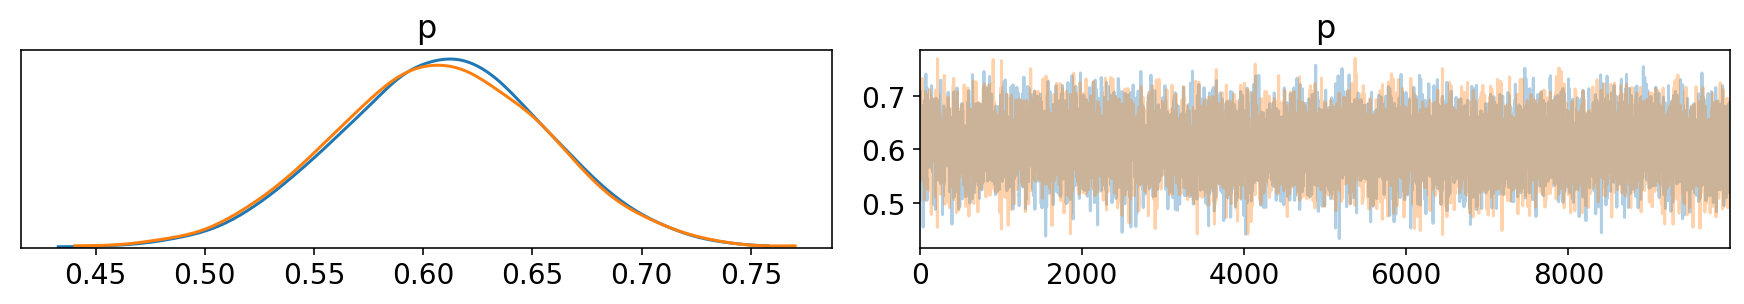

In [3]:
with Model() as experiment1:
    p = Uniform('p', .4, .8)
    y = Binomial('y', n=n, p=p, observed=heads)
    trace = sample(10000)
    
print(summary(trace))
traceplot(trace)

### Effect of changing the prior on solution

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:12<00:00, 1658.59draws/s]
/Users/samisaf/opt/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


       mean        sd  mc_error   hpd_2.5  hpd_97.5        n_eff      Rhat
p  0.526572  0.019686    0.0002  0.486306      0.55  8753.760726  1.000142


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f17add0>,
      dtype=object)

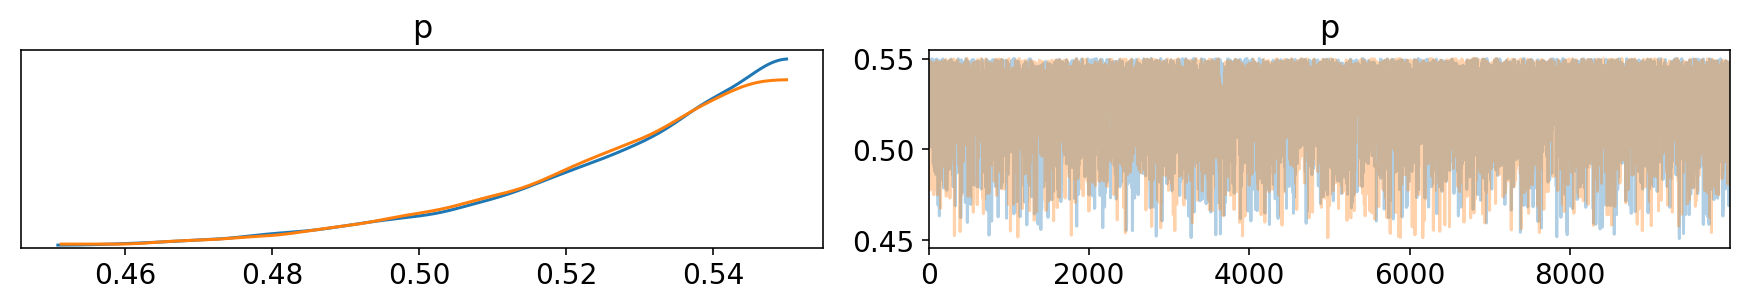

In [4]:
# We tell the model that we think that the coin is fair by making p tightly centered around 0.5

with Model() as experiment2:
    p = Uniform('p', .45, .55) 
    y = Binomial('y', n=n, p=p, observed=heads)
    trace = sample(10000)
    
print(summary(trace))
traceplot(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:09<00:00, 2169.95draws/s]
/Users/samisaf/opt/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


       mean        sd  mc_error   hpd_2.5  hpd_97.5       n_eff      Rhat
p  0.607889  0.048183  0.000526  0.512116  0.699023  7890.44293  0.999976


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c221a9750>,
      dtype=object)

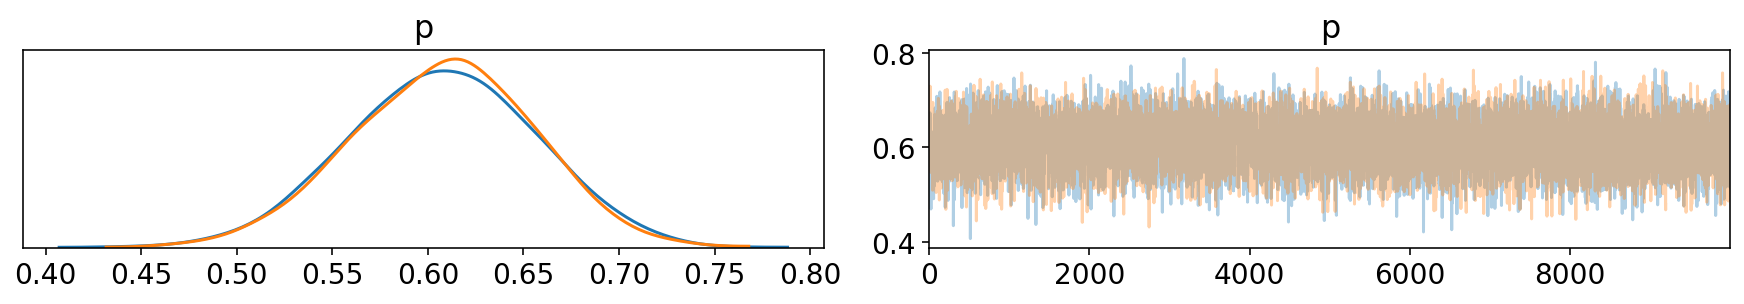

In [5]:
# We tell the model that we think the point is biased
# but we are less sure about that by spreading the interval of p

with Model() as experiment2:
    p = Uniform('p', .3, .9) 
    y = Binomial('y', n=n, p=p, observed=heads)
    trace = sample(10000)
    
print(summary(trace))
traceplot(trace)

### Effect of doing more trials

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 2310.12draws/s]
/Users/samisaf/opt/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


       mean        sd  mc_error  hpd_2.5  hpd_97.5       n_eff      Rhat
p  0.609812  0.015619  0.000528  0.57766  0.640032  726.694372  1.002302


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f811890>,
      dtype=object)

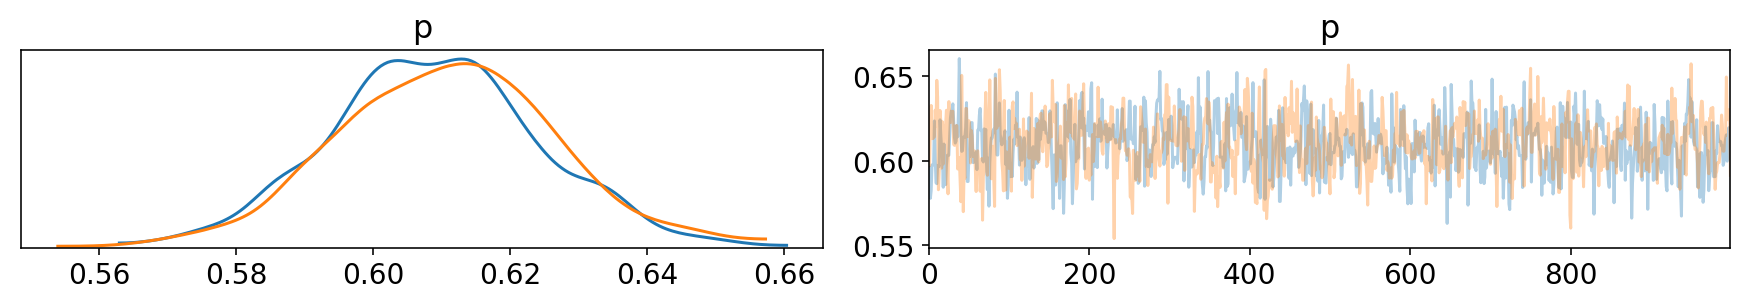

In [6]:
# by doing more trials, we get the same posteior mean, but it is more tightly centered

n2 = 1000
k2 = 610

with Model() as experiment2:
    p = Uniform('p', 0.4, 0.8)
    y = Binomial('y', n=n2, p=p, observed=k2)
    trace = sample(1000)

print(summary(trace))

traceplot(trace)

## Example 2 - gapminder data for child survival and babies per woman

In [7]:
gdata=pd.read_csv('gapminder.csv').query('year == 1985')
#gdata.sort_values('age5_surviving',inplace=True)
gdata.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
131,Albania,1985,Europe,2966799.0,72.71,94.570,3.23,4267.0,11.682409
212,Algeria,1985,Africa,22565908.0,67.18,92.880,5.98,11030.0,30.198494
293,Angola,1985,Africa,9745209.0,47.50,77.170,7.21,4117.0,11.271732
374,Antigua and Barbuda,1985,America,65744.0,72.13,96.946,2.09,11383.0,31.164956


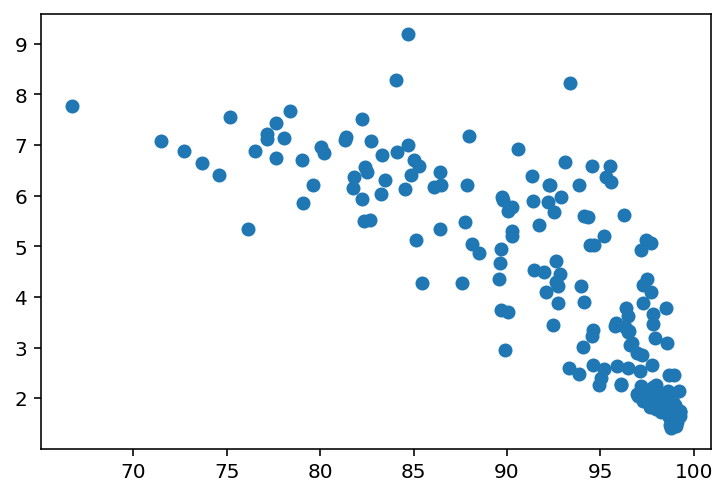

In [8]:
plt.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

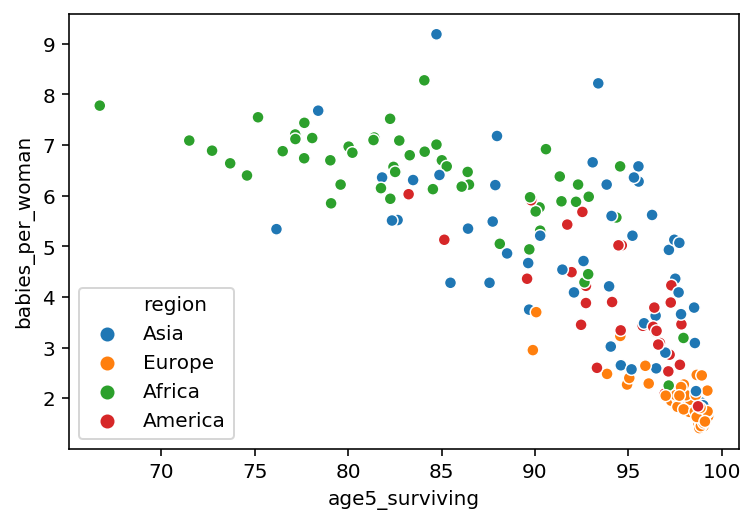

In [9]:
sns.scatterplot(x=gdata.age5_surviving, 
                y=gdata.babies_per_woman, 
                hue=gdata.region)

We will model the relationship between babies per woman, and survival to age5:
$babies per woman = intercept + slope . age5 surviving$

In [10]:
with Model() as gapminderExperiment:
    intercept = Uniform('intercept', 5, 15)
    slope = Uniform('slope', -1, 1)
    mu = intercept + slope * (gdata.age5_surviving - 65)
    sd = 1
    babies = Normal('babies', mu=mu, sd=sd, observed=gdata.babies_per_woman)
    trace = sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:23<00:00, 903.43draws/s] 
The number of effective samples is smaller than 25% for some parameters.


In [11]:
summary(trace)

/Users/samisaf/opt/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,10.202040,0.285205,0.004817,9.625423,10.747603,4084.601306,1.000398
slope,-0.219541,0.010348,0.000174,-0.239493,-0.198608,4115.824690,1.000482


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f46c5d0>,
      dtype=object)

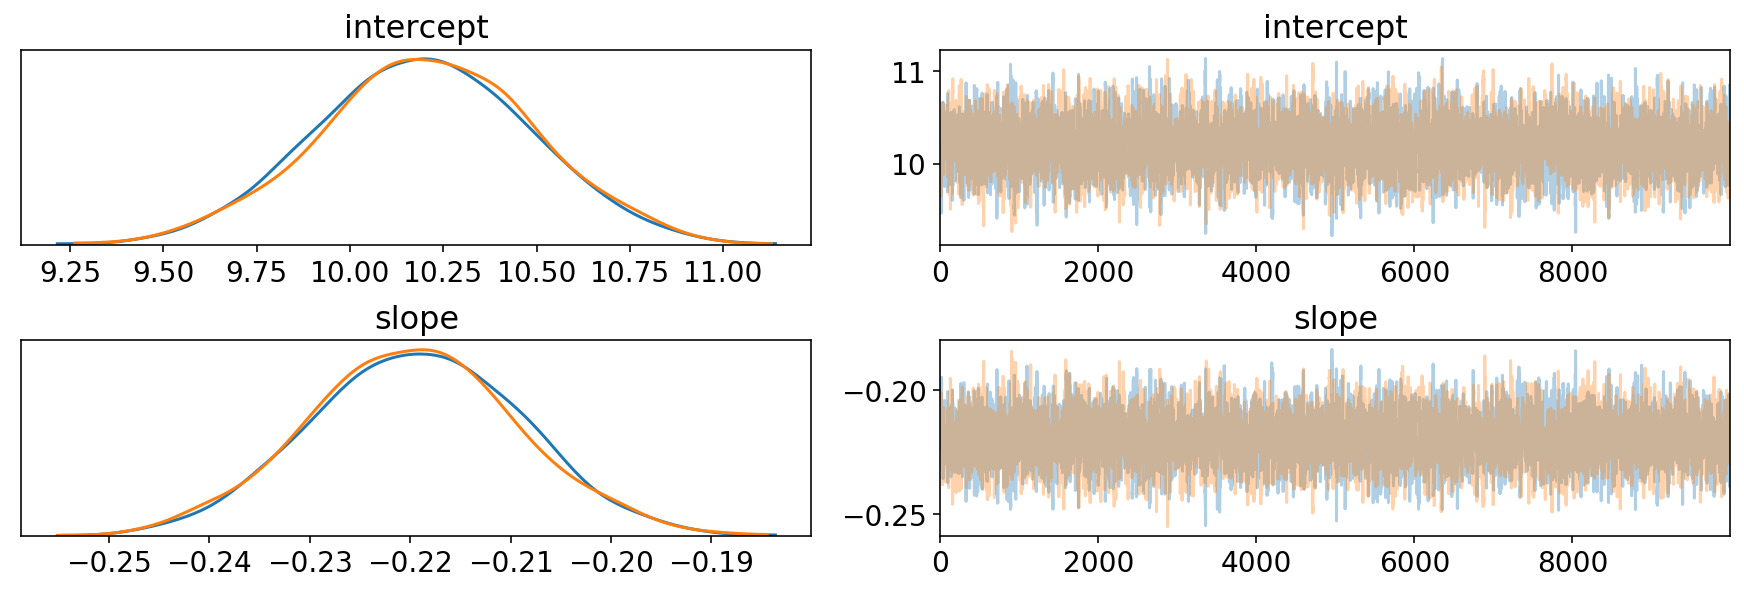

In [12]:
traceplot(trace)

In [13]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving']-65)

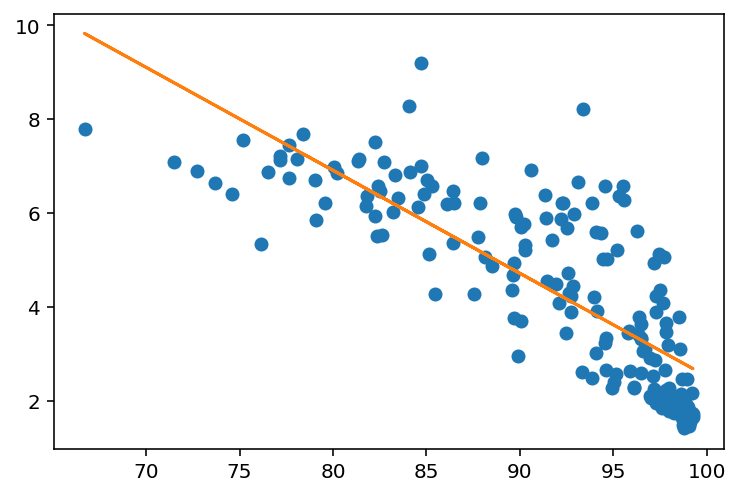

In [14]:
plt.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
plt.plot(gdata['age5_surviving'],babies,'C1')

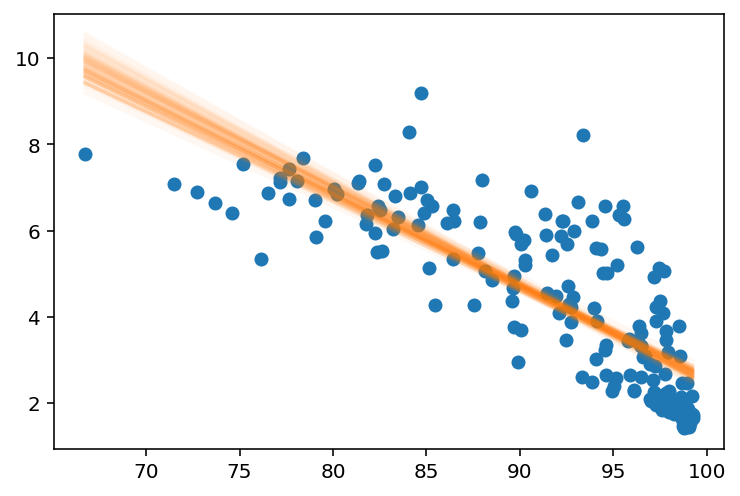

In [15]:
plt.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    plt.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)